In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

In [91]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [89]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


Какой клиент совершил больше всего успешных операций?

In [88]:
rate_of_success_users = logs.query('success == True') \
    .groupby('client', as_index = False) \
    .agg({'success':'sum'}) \
    .sort_values('success', ascending= False)

(2845, 2)

In [48]:
rate_of_success_users.query("success == 41").sort_values('client')

,client,success
332,12179,41
810,28719,41
1020,36165,41
1487,52870,41
1758,61468,41
1759,61473,41
2231,78349,41
2345,82563,41
2626,92584,41


С какой платформы осуществляется наибольшее количество успешных операций?



In [61]:
rate_of_success_platforms = logs.query('success == True') \
    .groupby('platform', as_index = False) \
    .agg({'success':'sum'}) \
    .sort_values('success', ascending=False)
rate_of_success_platforms

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?



In [104]:
full_data = logs.merge(user_data, on='client')
premium_orders = full_data.query('premium == True').platform
premium_orders.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. 

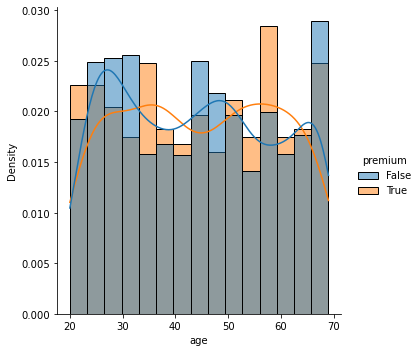

In [109]:
sns.displot(data = full_data, x='age', hue='premium', kde=True, common_norm=False, stat='density')

Постройте график распределения числа успешных операций.

In [121]:
successes = logs.query('success == True').client.value_counts()
successes.rename('successes')

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: successes, Length: 2845, dtype: int64

<AxesSubplot:xlabel='client', ylabel='count'>

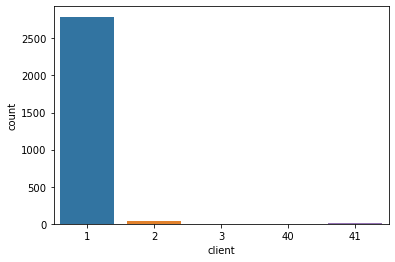

In [122]:
sns.countplot(x=successes)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста. По оси x – возраст, y – число успешных операций. 

<AxesSubplot:xlabel='age', ylabel='count'>

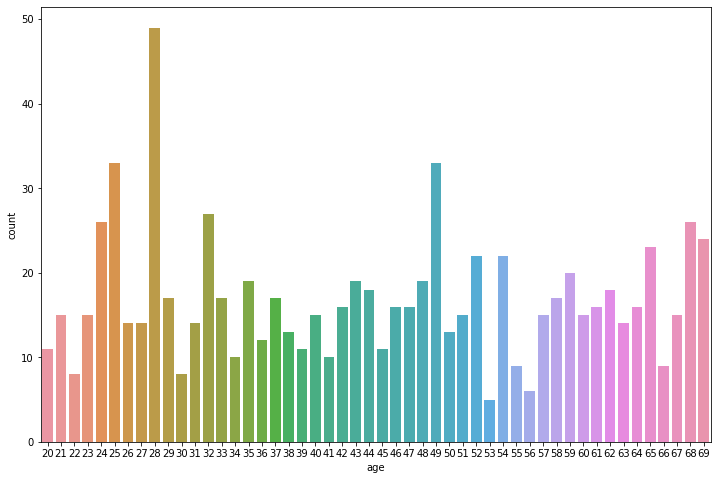

In [135]:
succ_and_age = full_data.query("platform == 'computer' and success == True")

plt.figure(figsize=(12, 8))
sns.countplot(data=succ_and_age, x='age')